In [ ]:
#The goal of clustering is to divide the population or set of data points into a number of groups so that the data points within each group are more comparable to one another and different from the data points within the other groups. It is essentially a grouping of things based on how similar and different they are to one another. 
import pandas as pd
import numpy as np
mall_data= pd.read_csv('Mall_Customers.csv')
print(mall_data)
mall_data=mall_data.dropna()
mall_data['Gender']=mall_data['Gender'].map({'Male':0 ,'Female':1})


In [20]:
print(mall_data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       0   19                  15                      39
1             2       0   21                  15                      81
2             3       1   20                  16                       6
3             4       1   23                  16                      77
4             5       1   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196       1   35                 120                      79
196         197       1   45                 126                      28
197         198       0   32                 126                      74
198         199       0   32                 137                      18
199         200       0   30                 137                      83

[200 rows x 5 columns]


In [35]:
from sklearn.preprocessing import StandardScaler
x=mall_data[['Age','Annual Income (k$)','Spending Score (1-100)']]
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)


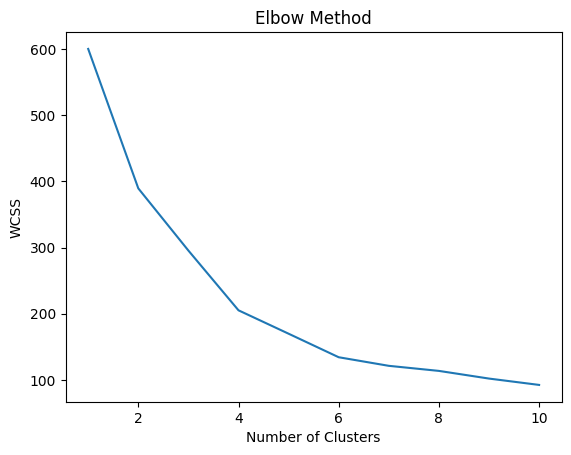

In [40]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
# Let's assume the optimal number of clusters is 4
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(x_scaled)
mall_data['Cluster'] = clusters



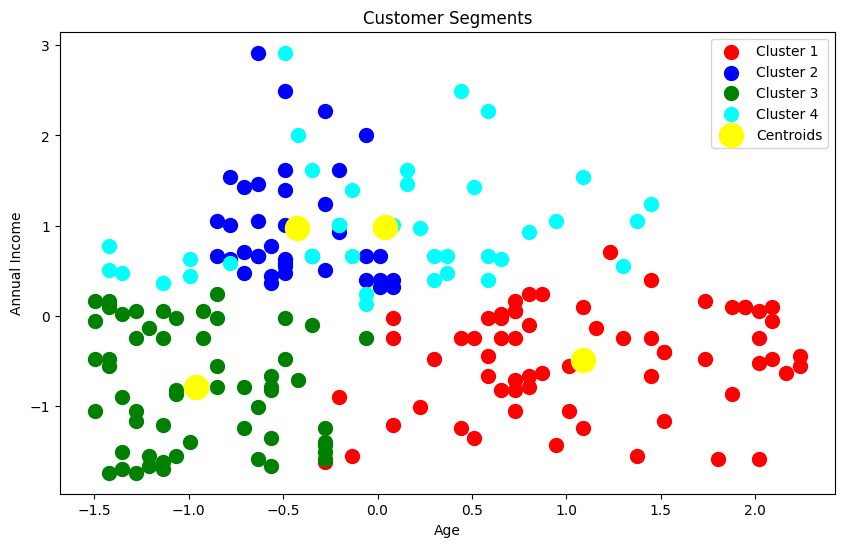

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(x_scaled[clusters == 0, 0], x_scaled[clusters == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x_scaled[clusters == 1, 0], x_scaled[clusters == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x_scaled[clusters == 2, 0], x_scaled[clusters == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x_scaled[clusters == 3, 0], x_scaled[clusters == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Customer Segments')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()
plt.show()
